## Kiva Data Analysis: Exploring Relationships 
<br>
This script contains the following: <br>
1. Importing Visualization Libraries and Data <br>
2. Data Cleaning <br>
3. Exploring Relationships <br>
4. Exporting Visualizations <br>

## 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib 
import os 

In [3]:
# Check for matplotlib version to ensure it's up to date 
matplotlib.__version__

'3.3.2'

In [4]:
# Ensure the charts created are displayed in the notebook without the need to call them specifically 
%matplotlib inline

In [5]:
# Define path
path = r'/Users/julie.spigner/Desktop/Kiva Data Analysis'

In [6]:
path

'/Users/julie.spigner/Desktop/Kiva Data Analysis'

In [7]:
# Import dataframes 

df_loans = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_loans_cleaned.pkl'))

In [8]:
df_ltr = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_loan_theme_region_cleaned.pkl'))

## 2. Data Cleaning 
In the Kiva Data Analysis folder, there are four data sets to work with. I'm only using two here (df_loans and df_ltr) as I'm saving the other two for temporal and geospatial data analysis in another script. 

In [9]:
# Check size of dataframes
df_loans.shape

(671205, 20)

In [10]:
df_ltr.shape

(15736, 21)

In [11]:
# View dataframe 
df_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [12]:
# View names of columns 
df_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [13]:
# Check datatypes 
df_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [14]:
# Check for missing values 
df_loans.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

Notes: There are missing values in several columns. 

In [15]:
# Check for duplicates 
df_loans_dups = df_loans[df_loans.duplicated()]

In [16]:
df_loans_dups.shape

(0, 20)

Notes: There are no duplicates. 

In [17]:
# Find mixed type data 
for col in df_loans.columns.tolist(): 
    weird = (df_loans[[col]].applymap(type) != df_loans[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_loans[weird]) > 0: 
        print (col)

use
country_code
region
disbursed_time
funded_time
tags
borrower_genders


Notes: There are some mixed data types in some columns in df_loans.

In [18]:
# View names of columns 
df_ltr.columns

Index(['Partner ID', 'Field Partner Name', 'sector', 'Loan Theme ID',
       'Loan Theme Type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

In [19]:
# View dataframe 
df_ltr.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [20]:
# Command pandas not to assign any options regarding the max number of columns to display 
pd.options.display.max_columns = None 

In [21]:
# View the dataframe again with all columns in view 
df_ltr.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,number,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,1,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,58,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,7,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,1383,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,3,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [22]:
# Rename columns 
df_ltr.rename(columns = {'Partner ID' : 'partner_id', 'Field Partner Name' : 'field_partner_name', 'Loan Theme ID' : 'loan_theme_id', 'Loan Theme Type' : 'loan_theme_type', 'ISO' : 'iso', 'LocationName' : 'location_name'})

,partner_id,field_partner_name,sector,loan_theme_id,loan_theme_type,country,forkiva,region,geocode_old,iso,number,amount,location_name,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,1,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,58,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,7,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,1383,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,3,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15731,539,"N/A, direct to Sevamob",DSE Direct,a10500000081IYl,Health,South Africa,No,Nkangala,NaN,ZAF,1,50000,"Nkangala, South Africa","[(-25.9459898, 29.6035495)]",Nkangala; Mpumalanga; South Africa,"(-25.9459898, 29.6035495)",-25.945990,29.603549,ZAF,NaN,NaN
15732,540,"N/A, direct to Sanergy",DSE Direct,a10500000081HIw,Water and Sanitation,Kenya,No,Nairobi,"(-1.2833333, 36.8166667)",KEN,1,50000,"Nairobi, Kenya","[(-1.2920659, 36.8219462)]",Nairobi; Nairobi County; Kenya,"(-1.2920659, 36.8219462)",-1.292066,36.821946,"Nairobi, Kenya","(-1.2920659, 36.8219462)",NaN
15733,542,N/A direct to BioLite Inc.,DSE Direct,a1050000008AQrj,Clean Cookstove,Uganda,No,Kampala,"(0.3155556, 32.5655556)",UGA,1,50000,"Kampala, Uganda","[(0.3475964, 32.5825197)]",Kampala; Kampala; Central Region; Uganda,"(0.3475964, 32.5825197)",0.347596,32.582520,"Kampala, Uganda","(0.3475964, 32.5825197)",NaN
15734,543,N/A direct to LegWorks Inc.,DSE Direct,a1050000008AQwt,Health,Canada,No,Toronto,NaN,CAN,1,50000,"Toronto, Canada","[(43.653226, -79.3831843)]",Toronto; Toronto Division; Ontario; Canada,"(43.653226, -79.3831843)",43.653226,-79.383184,CAN,NaN,NaN


In [23]:
# Overwrite dataframe with renamed columns 
df_ltr = df_ltr.rename(columns = {'Partner ID' : 'partner_id', 'Field Partner Name' : 'field_partner_name', 'Loan Theme ID' : 'loan_theme_id', 'Loan Theme Type' : 'loan_theme_type', 'ISO' : 'iso', 'LocationName' : 'location_name'})

In [24]:
# Check datatypes 
df_ltr.dtypes

partner_id              int64
field_partner_name     object
sector                 object
loan_theme_id          object
loan_theme_type        object
country                object
forkiva                object
region                 object
geocode_old            object
iso                    object
number                  int64
amount                  int64
location_name          object
geocode                object
names                  object
geo                    object
lat                   float64
lon                   float64
mpi_region             object
mpi_geo                object
rural_pct             float64
dtype: object

Notes: The overwrite of the dataframe is successful with all columns being properly named and in lower case. 

In [25]:
# Check for missing values 
df_ltr.isnull().sum()

partner_id                0
field_partner_name        0
sector                    0
loan_theme_id             0
loan_theme_type           0
country                   0
forkiva                   0
region                    0
geocode_old           14536
iso                      14
number                    0
amount                    0
location_name             0
geocode                2074
names                  2075
geo                       0
lat                    2074
lon                    2074
mpi_region               14
mpi_geo                6065
rural_pct              1392
dtype: int64

Notes: There are some missing values. 

In [26]:
# Check for duplicates 
df_ltr_dups = df_ltr[df_ltr.duplicated()]

In [27]:
df_ltr_dups.shape

(0, 21)

Notes: There are no duplicates! 

In [28]:
# Check for mixed type data 
for col in df_ltr.columns.tolist(): 
    weird = (df_ltr[[col]].applymap(type) != df_ltr[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_ltr[weird]) > 0: 
        print (col)

geocode_old
iso
geocode
names
mpi_region
mpi_geo


Notes: There are some mixed type data in some columns. 

## 3. Exploring Relationships

<b>Correlations: df_loans</b>

In [29]:
# Create a correlation matrix using pandas 
df_loans.corr()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
id,1.000000,-0.049578,-0.027488,0.154787,-0.055832,-0.095418
funded_amount,-0.049578,1.000000,0.945044,-0.075276,0.149310,0.849168
loan_amount,-0.027488,0.945044,1.000000,-0.071251,0.184795,0.798697
partner_id,0.154787,-0.075276,-0.071251,1.000000,0.094878,-0.008575
term_in_months,-0.055832,0.149310,0.184795,0.094878,1.000000,0.227283
lender_count,-0.095418,0.849168,0.798697,-0.008575,0.227283,1.000000


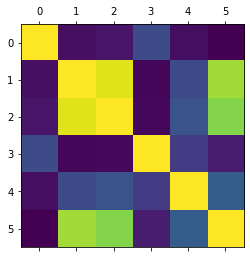

In [30]:
# Create a correlation heatmap using matplotlib
plt.matshow(df_loans.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

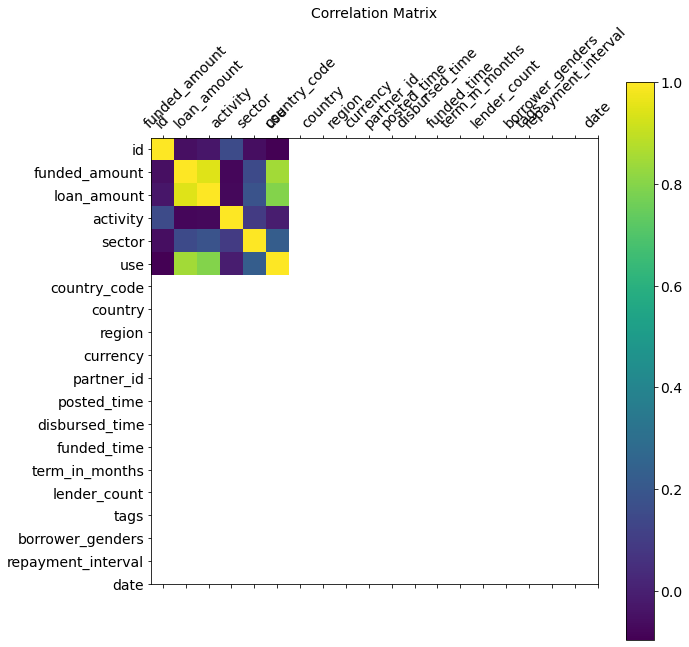

In [32]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df_loans.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_loans.shape[1]), df_loans.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_loans.shape[1]), df_loans.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a color legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Notes: This does not look right. 

<b>Create a correlation heatmap using seaborn:</b> 

In [33]:
# View columns to drop columns not needed for the correlation
df_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [50]:
# Create a subset excluding some columns not need for the correlation heatmap

sub = df_loans[['id', 'funded_amount', 'loan_amount', 'partner_id', 'term_in_months', 'lender_count']]

In [51]:
sub

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
0,653051,300.0,300.0,247.0,12.0,12
1,653053,575.0,575.0,247.0,11.0,14
2,653068,150.0,150.0,334.0,43.0,6
3,653063,200.0,200.0,247.0,11.0,8
4,653084,400.0,400.0,245.0,14.0,16
...,...,...,...,...,...,...
671200,1340323,0.0,25.0,58.0,13.0,0
671201,1340316,25.0,25.0,138.0,13.0,1
671202,1340334,0.0,25.0,138.0,13.0,0
671203,1340338,0.0,25.0,138.0,13.0,0


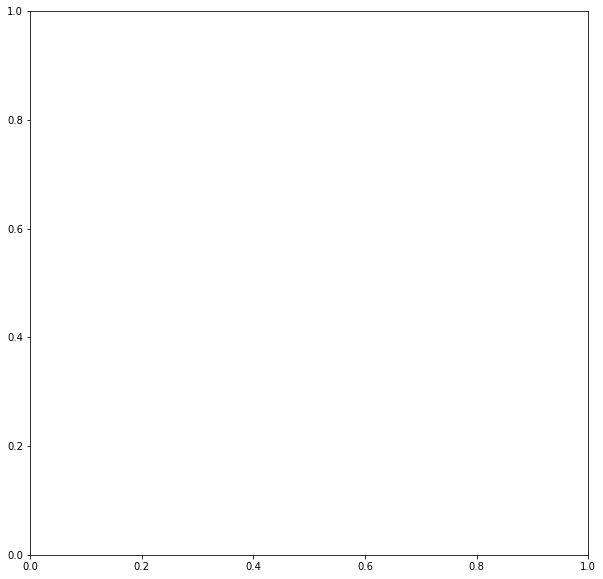

In [52]:
# Create a subplot with matplotlib. What it does is create an empty output, but this is okay—it's just to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [53]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

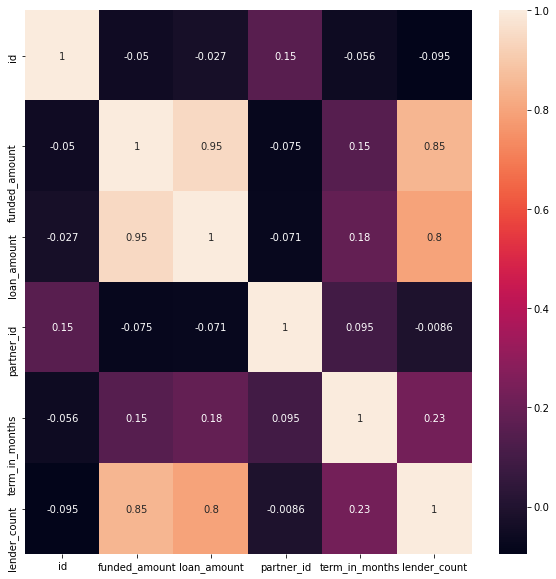

In [54]:
corr.figure

Notes: There are correlations between loan amount and funded amount and lender count.

<b>Correlations: df_ltr</b>

In [42]:
# Create a correlation matrix using pandas 
df_ltr.corr()

,partner_id,number,amount,lat,lon,rural_pct
partner_id,1.000000,-0.003530,-0.022004,-0.127596,-0.126001,0.044032
number,-0.003530,1.000000,0.744637,-0.084712,-0.008186,0.036338
amount,-0.022004,0.744637,1.000000,-0.079113,-0.045485,-0.005474
lat,-0.127596,-0.084712,-0.079113,1.000000,0.237230,-0.035972
lon,-0.126001,-0.008186,-0.045485,0.237230,1.000000,0.176531
rural_pct,0.044032,0.036338,-0.005474,-0.035972,0.176531,1.000000


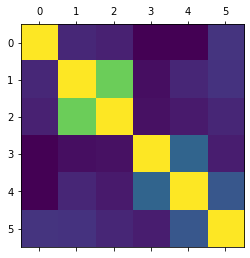

In [43]:
# Create a correlation heatmap using matplotlib 
plt.matshow(df_ltr.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

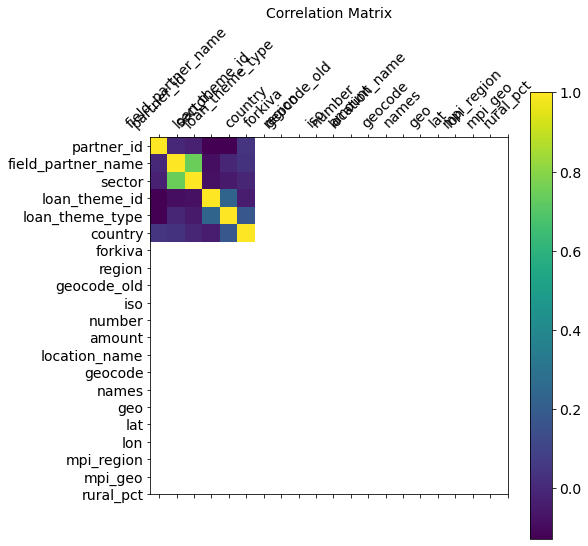

In [44]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_ltr.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_ltr.shape[1]), df_ltr.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_ltr.shape[1]), df_ltr.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Notes: This doesn't look right. I assume the matplotlib version I'm using has some bugs in it. It's not displaying correctly. 

<b> Create a correlation heatmap using seaborn:</b> 

In [47]:
# View columns to exclude columns not needed for the heatmap 
df_ltr.columns

Index(['partner_id', 'field_partner_name', 'sector', 'loan_theme_id',
       'loan_theme_type', 'country', 'forkiva', 'region', 'geocode_old', 'iso',
       'number', 'amount', 'location_name', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

In [48]:
# Create a subset excluding some columns

sub_ltr = df_ltr[['number', 'amount', 'lat', 'lon', 'rural_pct' ]]

In [49]:
sub_ltr

,number,amount,lat,lon,rural_pct
0,1,450,13.667260,102.897510,90.0
1,58,20275,13.028697,102.989615,90.0
2,7,9150,13.028697,102.989615,90.0
3,1383,604950,12.098292,105.313119,90.0
4,3,275,12.098292,105.313119,90.0
...,...,...,...,...,...
15731,1,50000,-25.945990,29.603549,NaN
15732,1,50000,-1.292066,36.821946,NaN
15733,1,50000,0.347596,32.582520,NaN
15734,1,50000,43.653226,-79.383184,NaN


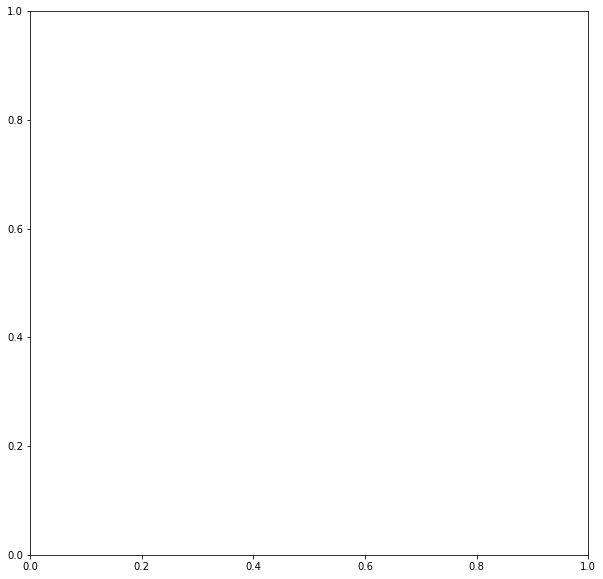

In [55]:
# Create a subplot with matplotlib. What it does is create an empty output, but this is okay—it's just to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [56]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
corr_ltr = sns.heatmap(sub_ltr.corr(), annot = True, ax = ax) 

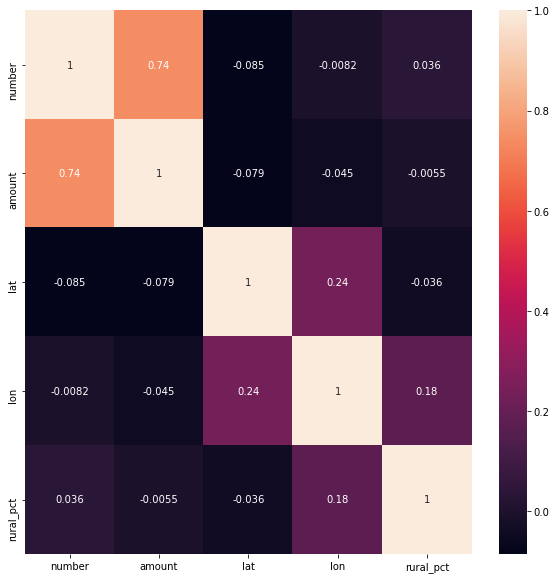

In [57]:
corr_ltr.figure

Notes: This correlation heatmap is showing weak relationships in almost all of them. The only strong relationships that exist here is between the number and amount which is documentation based information. Based on my perspective, this correlation heatmap is useless. 

<b>Scatterplots: </b>

In [58]:
# Quickly view the dataframe 
df_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


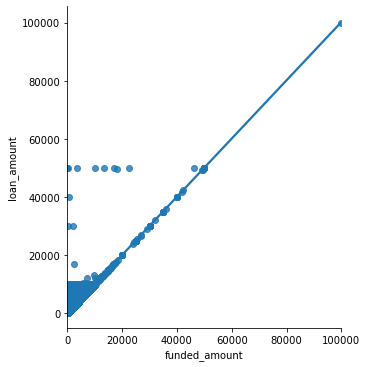

In [61]:
# Create a scatterplot for the "funded_amount" and "loan_amount" columns in seaborn 
sns.lmplot(x = 'funded_amount', y = 'loan_amount', data = df_loans)

Notes: There is an outlier here. There's a loan/funded amount of 100,000 USD. 

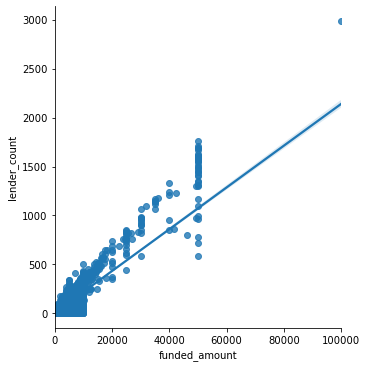

In [62]:
# Create a scatterplot for the "funded_amount" and "lender_count" columns in seaborn 
sns.lmplot(x = 'funded_amount', y = 'lender_count', data = df_loans)

<b> Pair Plots: </b>

Notes: The following columns are used in <b>sub</b>: "id", "funded_amount", "loan_amount", "partner_id", "term_in_months", and "lender_count". 

In [64]:
# Create a new subset to keep only the variables needed for the pair plot. 

sub_2 = sub[['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']]

# "id" and "partner_id" are excluded

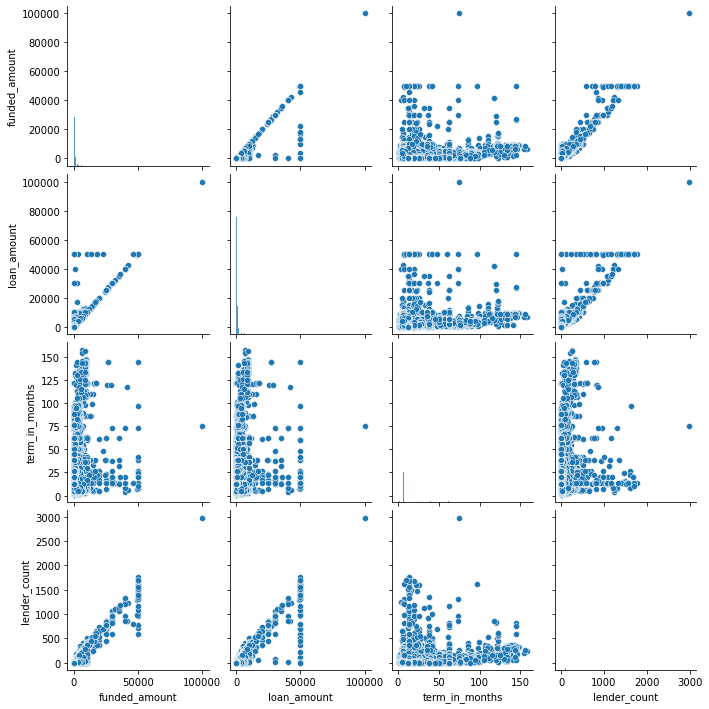

In [65]:
# Create a pair plot 
pp = sns.pairplot(sub_2)

Notes: The histogram charts are barely visible. This is due to the outlier mentioned earlier. The outlier is also visible in other scatterplots. 

<b> Categorical Plots: </b><br><br>
Creating a categorical variable that splits the "loan_amount" column into categories. 

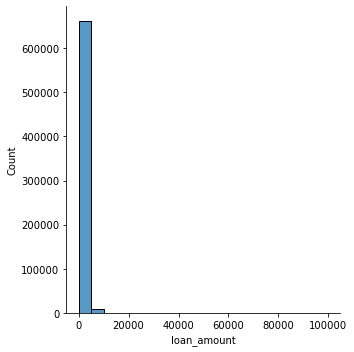

In [77]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the loan amount ranges. 
# You don't want to end up with too few observations in any one of the categories. 

sns.displot(df_loans['loan_amount'], bins = 20)

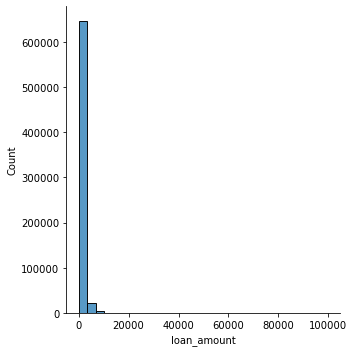

In [97]:
sns.displot(df_loans['loan_amount'], bins = 30)

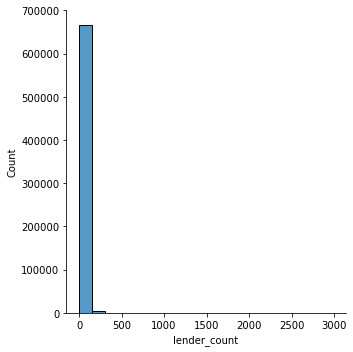

In [98]:
# Create another histogram to visualize the distribution of "lender_count" variables 
sns.displot(df_loans['lender_count'], bins = 20)

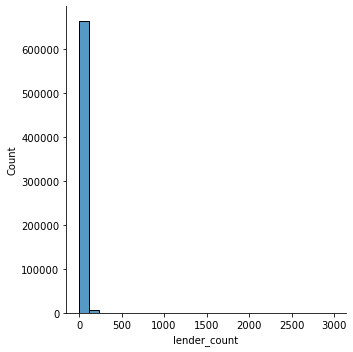

In [108]:
sns.displot(df_loans['lender_count'], bins = 25)

<b>Create categories based on "loan amount" into three cateogories: small loan, medium loan, large loan. </b><br> 
small loan: <= 1,000 <br>
medium loan: >= 1,001  & < 5,001 <br>
large loan: >= 5,001 <br>

In [109]:
df_loans.loc[df_loans['loan_amount'] <= 1000, 'loan_category'] = 'small loan'

In [110]:
df_loans.loc[(df_loans['loan_amount'] >= 1001) & (df_loans['loan_amount'] < 5001), 'loan_category'] = 'medium loan'

In [111]:
df_loans.loc[df_loans['loan_amount'] >= 5001, 'loan_category'] = 'large loan'

In [113]:
df_loans['loan_category'].value_counts(dropna = False)

small loan     521512
medium loan    140114
large loan       9579
Name: loan_category, dtype: int64

Notes: According to this loan_category, the ranges need to be fixed to show more variety. 

<b>Recreate categories based on "loan amount" into three cateogories: small loan, medium loan, large loan. </b><br> 
small loan: <= 500 <br>
medium loan: >= 501  & < 1,000 <br>
large loan: >= 1,001 <br>

In [115]:
df_loans.loc[df_loans['loan_amount'] <= 500, 'loan_cat'] = 'small loan'

In [119]:
df_loans.loc[(df_loans['loan_amount'] >= 501) & (df_loans['loan_amount'] <= 1000), 'loan_cat'] = 'medium loan'

In [120]:
df_loans.loc[df_loans['loan_amount'] >= 1001, 'loan_cat'] = 'large loan'

In [121]:
df_loans['loan_cat'].value_counts(dropna = False)

small loan     359569
medium loan    161943
large loan     149693
Name: loan_cat, dtype: int64

Notes: "loan_cat" shows a better range compared to "loan_category" which is much better! 

In [122]:
df_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'loan_category', 'loan_cat'],
      dtype='object')

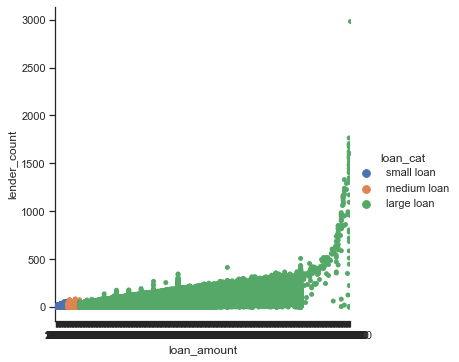

In [127]:
# Create a categorial plot in seaborn (sns) using the "loan_cat" categories 
sns.set(style = "ticks")
cp_1 = sns.catplot(x = 'loan_amount', y = 'lender_count', hue = 'loan_cat', data = df_loans)

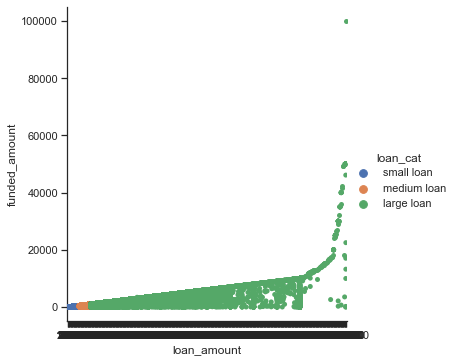

In [128]:
# Create another categorial plot in seaborn (sns) using the "loan_cat" categories 
sns.set(style = "ticks")
cp_2 = sns.catplot(x = 'loan_amount', y = 'funded_amount', hue = 'loan_cat', data = df_loans)

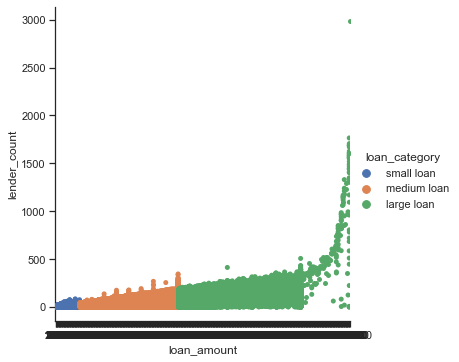

In [129]:
# Create a categorial plot in seaborn (sns) using the "loan_category" categories 
sns.set(style = "ticks")
cp_3 = sns.catplot(x = 'loan_amount', y = 'lender_count', hue = 'loan_category', data = df_loans)

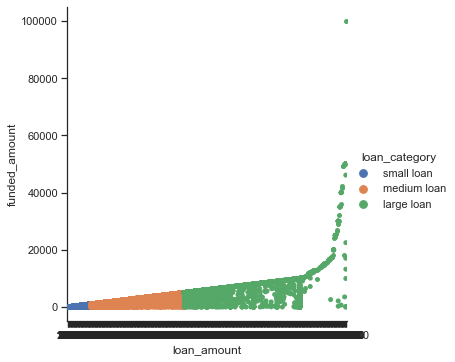

In [130]:
# Create another categorial plot in seaborn (sns) using the "loan_category" categories 
sns.set(style = "ticks")
cp_4 = sns.catplot(x = 'loan_amount', y = 'funded_amount', hue = 'loan_category', data = df_loans)

## 4. Exporting Data and Visualizations

<b>Visualizations:</b>

In [134]:
# Export visualizations outside of Jupyter as an image file using figure.savefig() function
corr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_loans.png'))

In [135]:
corr_ltr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_ltr.png'))

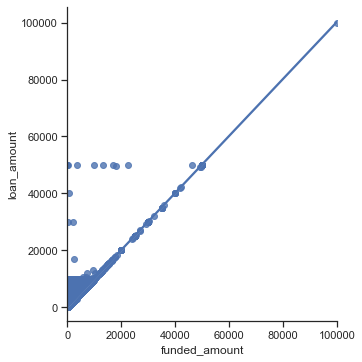

In [136]:
# Save visualizations in Jupyter memory 
sp_1 = sns.lmplot(x = 'funded_amount', y = 'loan_amount', data = df_loans)

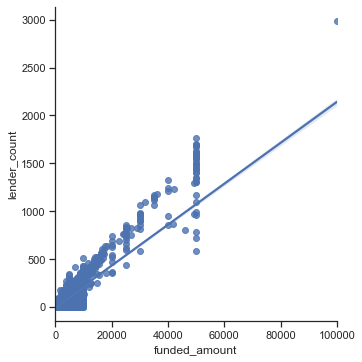

In [137]:
sp_2 = sns.lmplot(x = 'funded_amount', y = 'lender_count', data = df_loans)

In [138]:
pp.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pair_plot.png'))

In [139]:
sp_1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_1.png'))

In [140]:
sp_2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_2.png'))

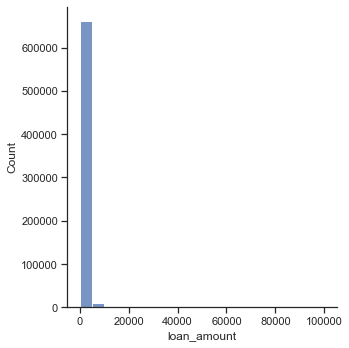

In [141]:
hg_1 = sns.displot(df_loans['loan_amount'], bins = 20)

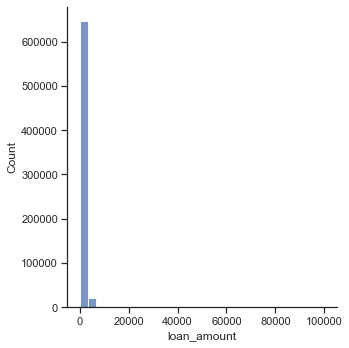

In [142]:
hg_2 = sns.displot(df_loans['loan_amount'], bins = 30)

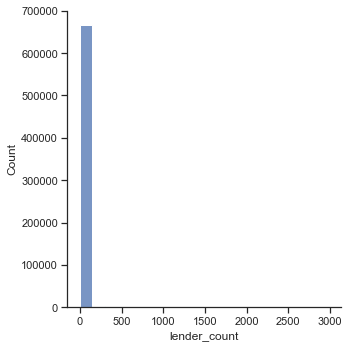

In [143]:
hg_3 = sns.displot(df_loans['lender_count'], bins = 20)

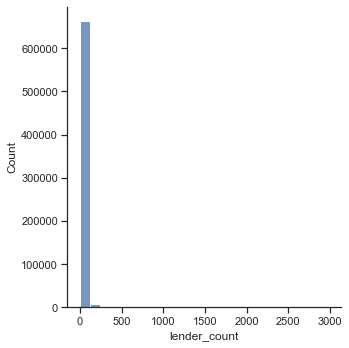

In [144]:
hg_4 = sns.displot(df_loans['lender_count'], bins = 25)

In [145]:
hg_1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_1.png'))

In [146]:
hg_2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_2.png'))

In [147]:
hg_3.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_3.png'))

In [148]:
hg_4.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_4.png'))

In [149]:
cp_1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_1.png'))

In [150]:
cp_2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_2.png'))

In [151]:
cp_3.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_3.png'))

In [152]:
cp_4.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_4.png'))

<b>Dataframes: </b>

In [153]:
# Export dataframes 
df_loans.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_loans_cleaned2.pkl'))

In [154]:
df_ltr.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ltr_cleaned2.pkl'))